# Image classification with feed forward neural network 

> FFNN sacrifices spatial feature considerations - expecting worst performance than CNNs

Can Pocketgrad do image classfication?

### Obligatory components:
1. `Training data`: Input data with **image**
1. `Loss function`: **Sparse Categorical Cross-Entropy loss function (Negative log likelihood loss)**
2. `Output layer`: **N neurons** for N classes
3. `Optimization algorithm`: SGD

In [1]:
# Import hugging face
import datasets as ds
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cifar10 = ds.load_dataset('cifar10', split= 'train')
df = pd.DataFrame({'img': cifar10['img'], 'label': cifar10['label']})
df.head()

,img,label
0,<PIL.PngImagePlugin.PngImageFile image mode=RG...,0
1,<PIL.PngImagePlugin.PngImageFile image mode=RG...,6
2,<PIL.PngImagePlugin.PngImageFile image mode=RG...,0
3,<PIL.PngImagePlugin.PngImageFile image mode=RG...,2
4,<PIL.PngImagePlugin.PngImageFile image mode=RG...,7


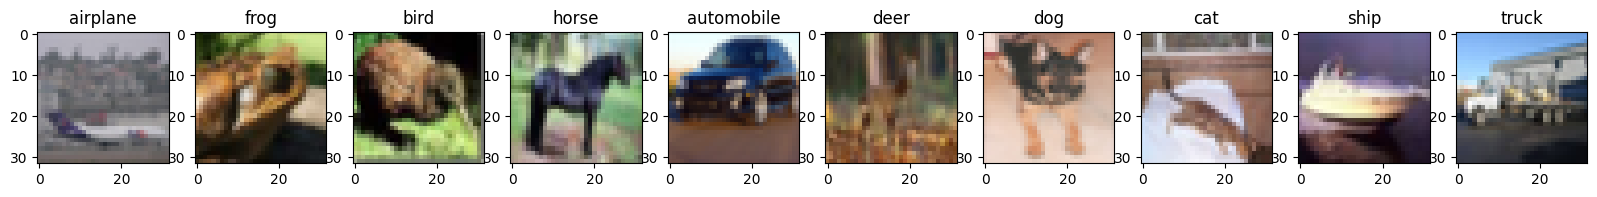

In [3]:
cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# Show example unique image label pairs
first_unique = df.drop_duplicates(subset='label', keep='first')
plt.figure(figsize = (20, len(first_unique)))
count = 1
for index, data in first_unique.iterrows():
    plt.subplot(1,10, count)
    plt.title(cifar_labels[data.label])
    plt.imshow(data.img)
    count += 1
plt.show()

In [4]:
# Converts PIL image to numpy array - ()
def convert_pil_to_numpy(pil):
    return np.array(pil)

# Shape of numpy image
convert_pil_to_numpy(df['img'].iloc[0]).shape

(32, 32, 3)